In [97]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



### Create data

In [98]:
np.random.seed(42) # for reproducibility

p1 = np.random.rand(50,2) * 10 + 1 
p2 = np.random.rand(50,2) * 10 + 12

p3 = np.random.rand(50,2) * 5 
p3[:,0] = p3[:,0]+ 15

p4 = np.random.rand(50,2) * 5 
p4[:,1] = p4[:,1]+ 15
 

points = np.concatenate([p1, p2, p3, p4])

### Plot data

Text(0.5, 1.0, 'Data points randomly placed into 4 groups')

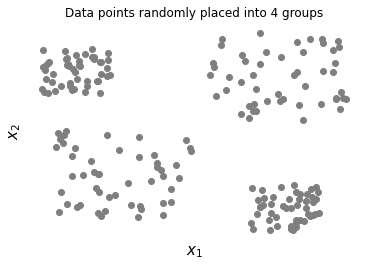

In [99]:
ax = plt.subplot(111) 
ax.scatter(points[:,0], points[:,1], c='#7f7f7f') 

ax.tick_params(axis='both', which='both', bottom=False, left=False,
top=False, right=False, labelbottom=False, labelleft=False)

# Remove the spines from the figure
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set labels and title
ax.set_xlabel('$x_1$', size=15)
ax.set_ylabel('$x_2$', size=15)
ax.set_title('Data points randomly placed into 4 groups')

### Init random centroids

In [100]:
np.random.seed(42)
k = 4

centroids = np.random.rand(k,2) * 20

### Plot data with centroids

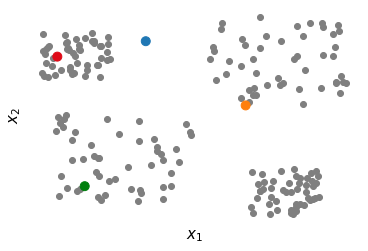

In [101]:
colors = ['#1f77b4', '#ff7f0e', '#007f0e', '#df0a17' ] 
ax = plt.subplot(111)


ax.scatter(points[:, 0], points[:, 1], c='#7f7f7f') 
ax.scatter(centroids[:, 0], centroids[:, 1], color=colors, s=80)

ax.set_xlabel('$x_1$', size=15)
ax.set_ylabel('$x_2$', size=15)



ax.tick_params(axis='both', which='both', bottom=False, left=False,
top=False, right=False, labelbottom=False, labelleft=False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

### Define measure distance

In [102]:
def euclidean_dist(x1, x2):
  
  if type(x1) is list:
    x1 = np.asarray(x1)
  if type(x2) is list:
    x2 = np.asarray(x2)

  dist = np.sqrt(sum((x1 - x2)**2))  
  return dist

### Calculate all distances

In [103]:
def calculate_distances(centroids, points):

  distances = np.zeros( (len(centroids), len(points)), dtype='float')

  for i, centroid in enumerate(centroids):
    for j, point in enumerate(points):
      distances[i,j] = euclidean_dist(centroid, point)

  return distances


### Assign Points to clusters

In [104]:
def update_clusters(distances):

  clusters = np.argmin(distances,axis=0)

  return clusters


### Plot function

In [105]:
def plot(map_colors, clusters, points, centroids):

  point_colors = [map_colors[i] for i in clusters]

  # Range of values in the x axis
  x_range = [points[:, 0].min(), points[:, 0].max()]
  fig = plt.figure(figsize=(7, 5))
  ax = plt.subplot(111)
  # Scatter the points
  ax.scatter(points[:, 0], points[:, 1], c=point_colors, s=50, lw=0)
  ax.scatter(centroids[:, 0], centroids[:, 1], c=colors, s=100, lw=1)
  # Draw the decision boundary

  ax.set_xlabel('$x_1$', size=15)
  ax.set_ylabel('$x_2$', size=15)
  ax.tick_params(axis='both', which='both', bottom=False, left=False,
  top=False, right=False, labelbottom=False, labelleft=False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.set_title('KMeans: Random Centroid Initialization')
  ax.legend(loc='lower right', scatterpoints=3)

### 1st iteration

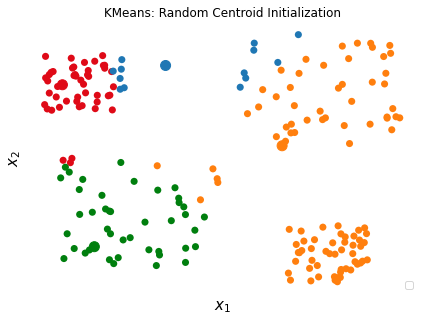

In [107]:
distances = calculate_distances(centroids, points)
clusters = update_clusters(distances)

map_colors = {0:'#1f77b4', 1:'#ff7f0e', 2:  '#007f0e', 3: '#df0a17' }

plot(map_colors, clusters, points, centroids)

### Update Centers

In [108]:
def update_centroids(clusters, points):
  
  size = max(clusters)+1
  
  for i in range(size):
    indices = np.where(clusters == i)
    cluster_points = points[indices]    
    centroids[i] = cluster_points.mean(axis=0)
  return centroids

### 2nd Iteration

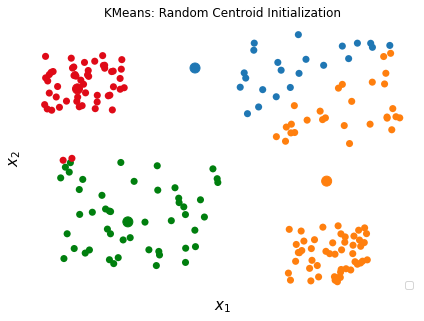

In [109]:
centroids = update_centroids(clusters, points)
distances = calculate_distances(centroids, points)
clusters = update_clusters(distances)
plot(map_colors, clusters, points, centroids)

3rd Iteration

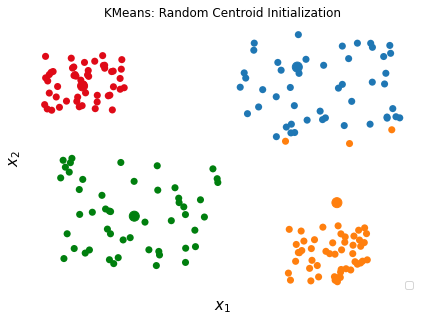

In [110]:
centroids = update_centroids(clusters, points)
distances = calculate_distances(centroids, points)
clusters = update_clusters(distances)
plot(map_colors, clusters, points, centroids)

4rth Iteration

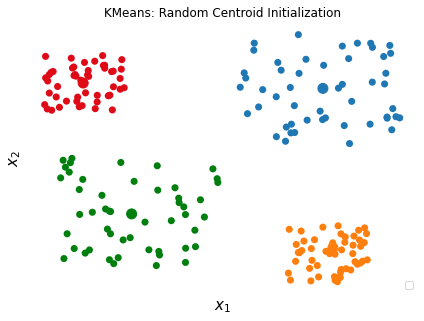

In [111]:
centroids = update_centroids(clusters, points)
distances = calculate_distances(centroids, points)
clusters = update_clusters(distances)
plot(map_colors, clusters, points, centroids)

5th Iteration

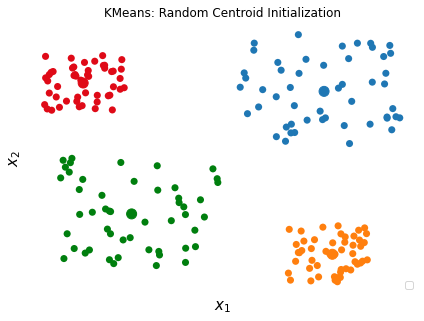

In [112]:
centroids = update_centroids(clusters, points)
distances = calculate_distances(centroids, points)
clusters = update_clusters(distances)
plot(map_colors, clusters, points, centroids)